<a href="https://colab.research.google.com/github/SadiaRazzaq/Task-1-Linear-Regression/blob/main/Task_01_Linear_Regression_Task_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sadia** **Razzaq**

**Task:01 Predict the percentage of student based on the no. of study hours.**


*   This is a simple linear regression task as it involves just 2 variables.
*   You can use R, Python, SAS Enterprise Miner or any other tool

*   Data Set http://bit.ly/w-data


# **Building Setup**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import seaborn as sns
%matplotlib inline

# **Data Acquisition**

In [25]:
#reading data
Dataset = pd.read_csv("http://bit.ly/w-data")
Dataset.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [26]:
Dataset.shape

(25, 2)

In [27]:
# Check for the null value in the Dataset
Dataset.isnull == True

False

# **Data Visualisation**

*Now Its time to plot our Dataset*

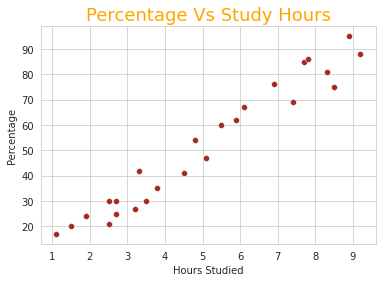

In [28]:
sns.set_style('whitegrid')
sns.scatterplot(y= Dataset['Scores'], x= Dataset['Hours'],color = 'brown')
plt.title('Percentage Vs Study Hours',size=18,color ='orange')
plt.ylabel('Percentage', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()

*From the above scatter we can witness that there is a correlation between the '**Percentage**' and '**Hours Studied**'*

# **Data Training**

In [29]:
# Defining X and y from the Data
X = Dataset.iloc[:, :-1].values  
y = Dataset.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size=0.2, random_state = 0)

In [20]:
LR = LinearRegression()  
LR.fit(train_X, train_y) 
print("Model is ready to use")

Model is ready to use


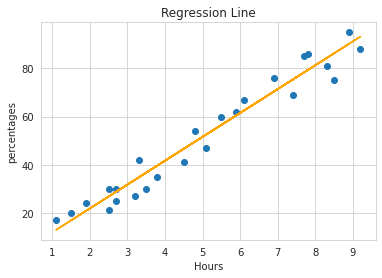

In [21]:
# Plotting the regression line
a= LR.coef_
b= LR.intercept_
line = a*X+b

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color ='orange');
plt.xlabel('Hours'),plt.ylabel('percentages')
plt.title("Regression Line")
plt.show()

# **Testing**

In [22]:
pred_y = LR.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Percentage': [k for k in pred_y]})
prediction

,Hours,Percentage
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


*Now compare the result with actual marks.*

In [23]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': val_y, 'Predicted': pred_y})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
#Visualizing Comparison
plt.scatter(val_X, val_y)
plt.scatter(val_X, pred_y)
plt.xlabel('Hours'), plt.ylabel('Scores')
plt.legend(["Actual","Predicted"])
plt.title("Comparison of Actual vs Predicted")
plt.show()

# **Find out: What will be predicted score if a student studies for 9.25 hrs/ day?**

In [ ]:
study_hours = [9.25]
answer = LR.predict([study_hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692


# **Evaluating Model on the basis of MSE & MAE.**

In [ ]:
# Calculating the accuracy of the model
print('MSE: ', metrics.mean_squared_error(val_y,pred_y))

MSE:  21.598769307217456


There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.

In [ ]:
# Calculating the accuracy of the model
print('MAE: ', metrics.mean_absolute_error(val_y,pred_y))

MAE:  4.183859899002982


Here MAE implies that chances of getting wrong value is fairly low. 